In [1]:
from pylab import *
from scipy.integrate import *

La caida libre con fricción, $f_{fric} = -\gamma |v|\hat v$, es:
$$
\ddot x = -\gamma v_x \\
\ddot y = -g -\gamma v_y
$$
o de manera equivalente
$$
\dot x = v_x \\
\dot v_x = -\gamma v_x \\
\dot y = v_y \\
\dot v_y = -g -\gamma v_y
$$

In [69]:
def caida(t,vec,g=9.81,gamma=0):
    d_vec = zeros_like(vec)
    # vec = x , vx , y , vy
    d_vec[0] = vec[1]
    d_vec[1] = -gamma*vec[1]
    d_vec[2] = vec[3]
    d_vec[3] = -g - gamma*vec[3]
    return d_vec

def suelo(t,vec,g=9.81,gamma=0):
    return vec[2]

In [78]:
tf = 2
ci = [0,0.5,2,0]
t = linspace(0,tf)
x_v = solve_ivp(caida,(0,tf),ci,args=(9.81,0.0,),dense_output=True,events=suelo)
x_v_f = solve_ivp(caida,(0,tf),ci,args=(9.81,0.3,),dense_output=True,events=suelo)

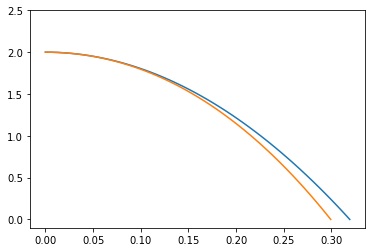

In [82]:
t = linspace(0,x_v.t_events[0][0])
x,vx,y,vy = x_v.sol(t)
plot(x,y)
t = linspace(0,x_v_f.t_events[0][0])
x,vx,y,vy = x_v_f.sol(t)
plot(x,y)
ylim([-0.1,2.5])
show()